# minuteStepsWide_merged Dataset

Exploring & Preprocessing:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/University/6th Semester/Sixth Semester/IDS-AIProject/FitabaseData4.12.16-5.12.16/minuteStepsWide_merged.csv'
df_steps_wide = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(df_steps_wide.head())

           Id           ActivityHour  Steps00  Steps01  Steps02  Steps03  \
0  1503960366  4/13/2016 12:00:00 AM        4       16        0        0   
1  1503960366   4/13/2016 1:00:00 AM        0        0        0        0   
2  1503960366   4/13/2016 2:00:00 AM        0        0        0        0   
3  1503960366   4/13/2016 3:00:00 AM        0        0        0        0   
4  1503960366   4/13/2016 4:00:00 AM        0        0        0        0   

   Steps04  Steps05  Steps06  Steps07  ...  Steps50  Steps51  Steps52  \
0        0        9        0       17  ...        0        9        8   
1        0        0        0        0  ...        0        0        0   
2        0        0        0        0  ...        0        0        0   
3        0        0        0        0  ...        0        0        0   
4        0        0        0        0  ...        0        0        0   

   Steps53  Steps54  Steps55  Steps56  Steps57  Steps58  Steps59  
0        0       20        1        0

In [2]:
# Display basic information about the dataset
print(df_steps_wide.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21645 entries, 0 to 21644
Data columns (total 62 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            21645 non-null  int64 
 1   ActivityHour  21645 non-null  object
 2   Steps00       21645 non-null  int64 
 3   Steps01       21645 non-null  int64 
 4   Steps02       21645 non-null  int64 
 5   Steps03       21645 non-null  int64 
 6   Steps04       21645 non-null  int64 
 7   Steps05       21645 non-null  int64 
 8   Steps06       21645 non-null  int64 
 9   Steps07       21645 non-null  int64 
 10  Steps08       21645 non-null  int64 
 11  Steps09       21645 non-null  int64 
 12  Steps10       21645 non-null  int64 
 13  Steps11       21645 non-null  int64 
 14  Steps12       21645 non-null  int64 
 15  Steps13       21645 non-null  int64 
 16  Steps14       21645 non-null  int64 
 17  Steps15       21645 non-null  int64 
 18  Steps16       21645 non-null  int64 
 19  Step

In [3]:
# Check for missing values
print(df_steps_wide.isnull().sum())


Id              0
ActivityHour    0
Steps00         0
Steps01         0
Steps02         0
               ..
Steps55         0
Steps56         0
Steps57         0
Steps58         0
Steps59         0
Length: 62, dtype: int64


Data Cleaning:

In [4]:
# Convert 'ActivityHour' to datetime format
df_steps_wide['ActivityHour'] = pd.to_datetime(df_steps_wide['ActivityHour'])


C:\Users\intag\AppData\Local\Temp\ipykernel_8784\781816675.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_steps_wide['ActivityHour'] = pd.to_datetime(df_steps_wide['ActivityHour'])


In [5]:
# Remove duplicates 
df_steps_wide.drop_duplicates(inplace=True)

Data Visualization:

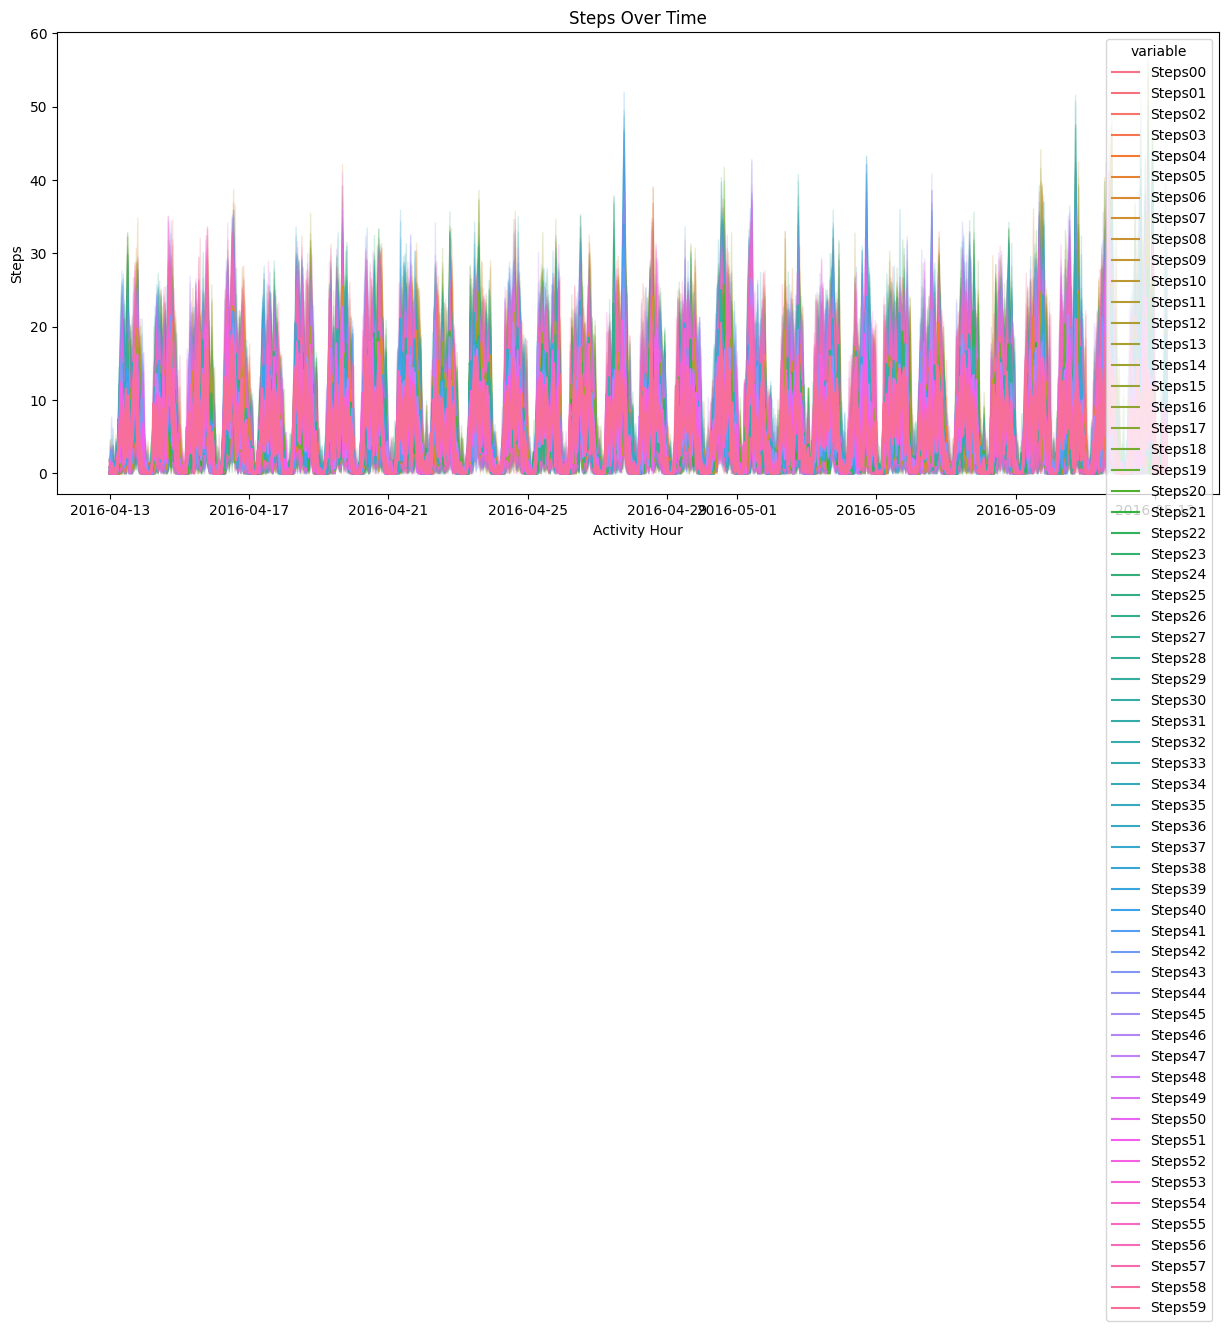

In [7]:
# Time series plot
plt.figure(figsize=(15, 6))
sns.lineplot(x='ActivityHour', y='value', hue='variable', 
             data=pd.melt(df_steps_wide, id_vars=['ActivityHour'], 
                          value_vars=df_steps_wide.columns[2:]))
plt.title('Steps Over Time')
plt.xlabel('Activity Hour')
plt.ylabel('Steps')
plt.show()


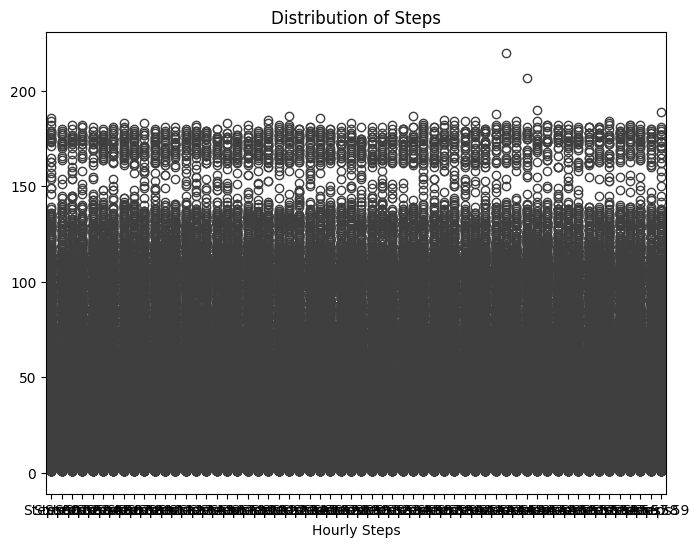

In [6]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_steps_wide.iloc[:, 2:])
plt.title('Distribution of Steps')
plt.xlabel('Hourly Steps')
plt.show()

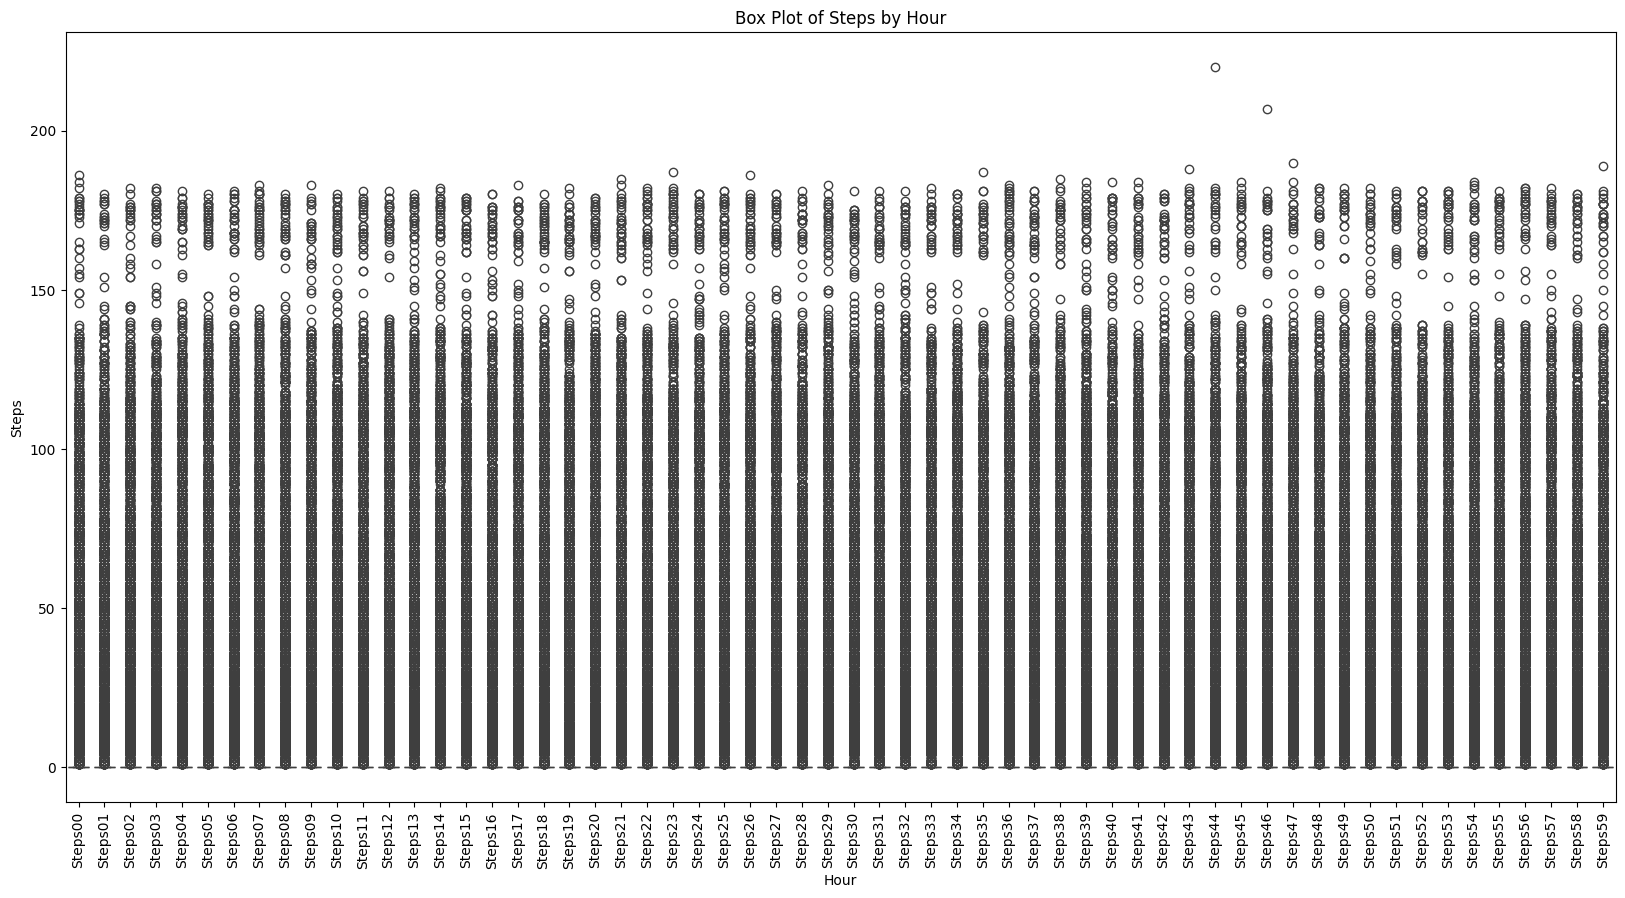

In [7]:
# Melt the dataframe to long format for easy plotting
df_melted = pd.melt(df_steps_wide, id_vars=['Id', 'ActivityHour'], var_name='Hour', value_name='Steps')

# Box plot for each column
plt.figure(figsize=(20, 10))
sns.boxplot(x='Hour', y='Steps', data=df_melted)
plt.title('Box Plot of Steps by Hour')
plt.xlabel('Hour')
plt.ylabel('Steps')
plt.xticks(rotation=90)
plt.show()


Removing Outliers

In [8]:
# Function to remove outliers using IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_no_outliers, outliers

# Melt the dataframe to long format for easy plotting
df_melted = pd.melt(df_steps_wide, id_vars=['Id', 'ActivityHour'], var_name='Hour', value_name='Steps')

# Remove outliers for each hour
outliers_dict = {}
for hour in df_melted['Hour'].unique():
    df_no_outliers, outliers = remove_outliers_iqr(df_melted[df_melted['Hour'] == hour], 'Steps')
    df_melted.loc[df_melted['Hour'] == hour, 'Steps'] = df_no_outliers['Steps']
    outliers_dict[hour] = outliers


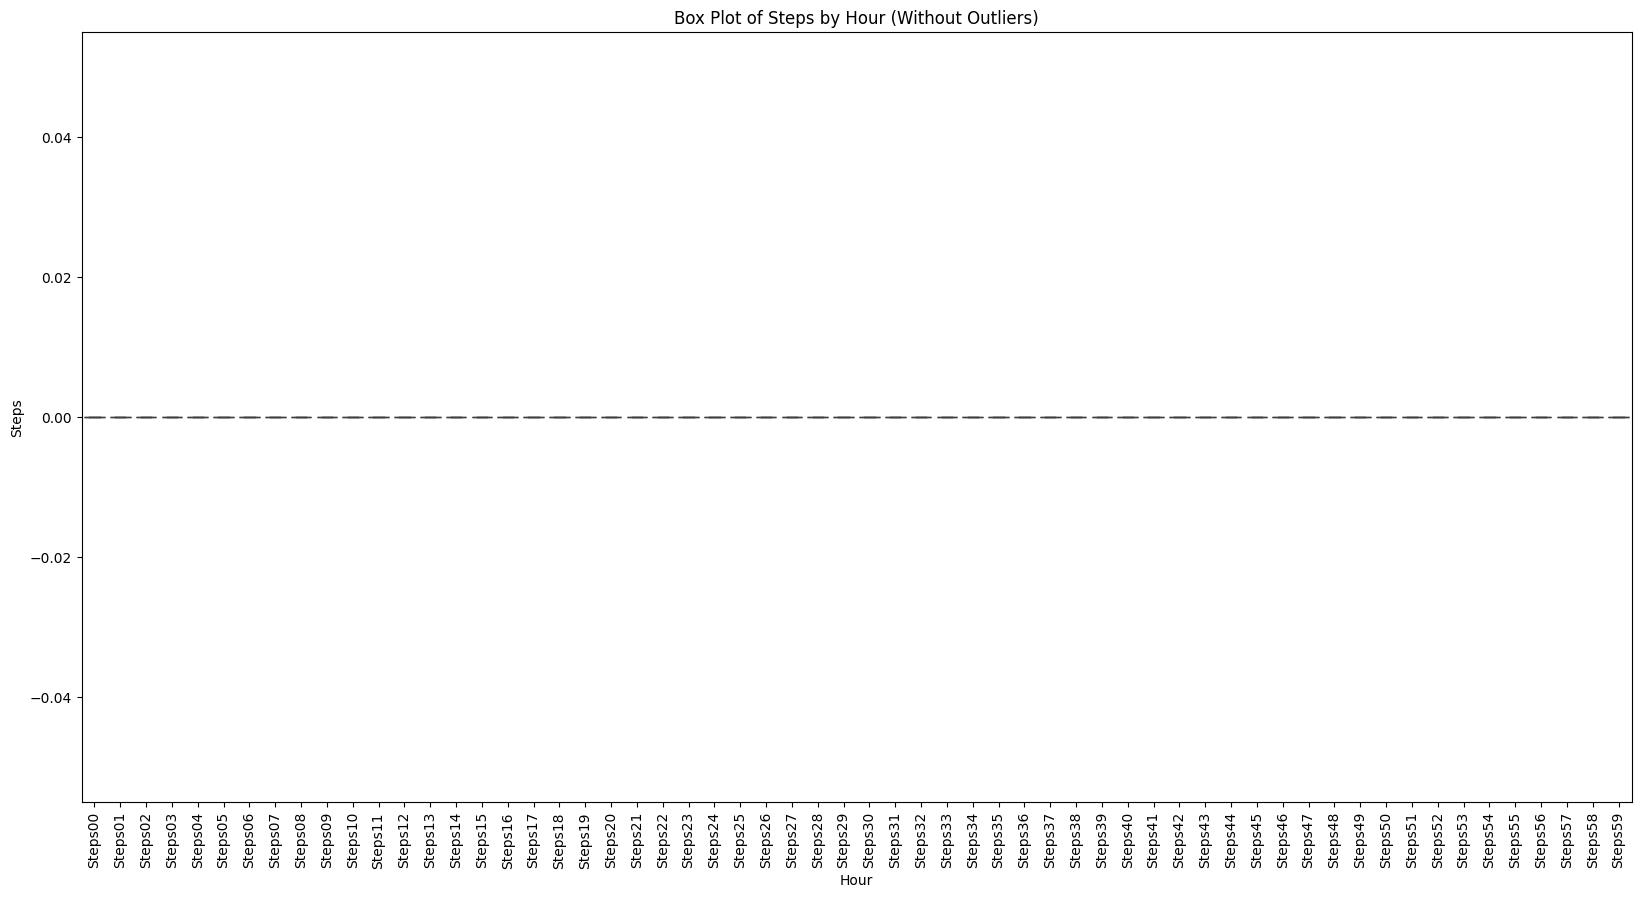

In [9]:
# Box plot for each column without outliers
plt.figure(figsize=(20, 10))
sns.boxplot(x='Hour', y='Steps', data=df_melted)
plt.title('Box Plot of Steps by Hour (Without Outliers)')
plt.xlabel('Hour')
plt.ylabel('Steps')
plt.xticks(rotation=90)
plt.show()

In [10]:
# df_minute_intensities_wide is our DataFrame with outliers removed

# Specifying the path to save the filtered dataset
filteredDatasetPath = '/University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteStepsWide_merged_Filtered.csv'

# Saving the DataFrame to a CSV file
df_melted.to_csv(filteredDatasetPath, index=False)

print(f"Filtered dataset saved to: {filteredDatasetPath}")

Filtered dataset saved to: /University/6th Semester/Sixth Semester/IDS-AIProject/FilteredFitbaseData/minuteStepsWide_merged_Filtered.csv
